In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import torch

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
code_path = "/content/drive/MyDrive/BHM/"
sys.path.append(code_path)
from bhm import *

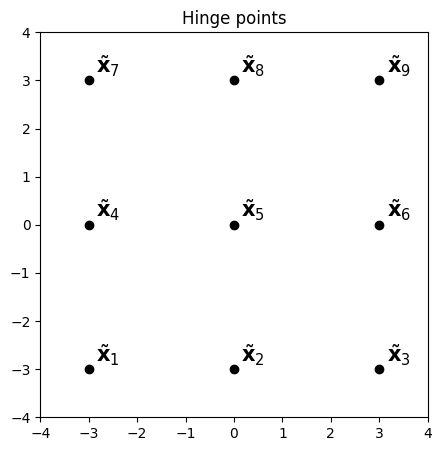

In [ ]:
torch.random.manual_seed(2021)

xy_upper_bound = np.array([3,3])
xy_lower_bound = np.array([-3,-3])
width = 3
x_ax = np.linspace(start=xy_lower_bound[0], stop=xy_upper_bound[0], num=width)
y_ax = np.linspace(start=xy_lower_bound[1], stop=xy_upper_bound[1], num=width)
x_grid, y_grid = np.meshgrid(x_ax, y_ax)
grid_points = np.concatenate((x_grid[:,:,np.newaxis], y_grid[:,:,np.newaxis]), axis=-1)
grid_points = grid_points.reshape((-1,2))

plt.figure(figsize=(5,5))
plt.scatter(grid_points[:,0], grid_points[:,1], c='k', marker='o')
for i in range(grid_points.shape[0]):
    plt.text(grid_points[i,0]+0.15, grid_points[i,1]+0.15, r'$\tilde{\bf{x}}$'+'$_{}$'.format(i+1), fontsize=15)
plt.title('Hinge points')
plt.xlim([-4,4])
plt.ylim([-4,4]);


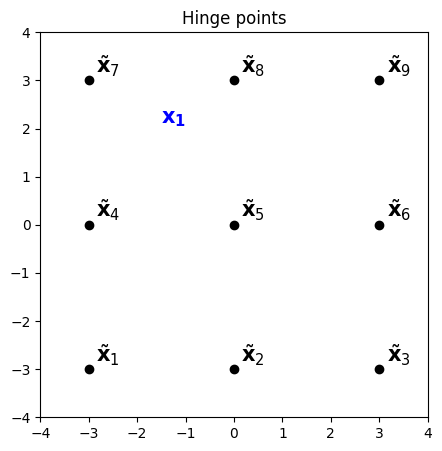

In [ ]:
gamma = 0.5
X = torch.tensor([[-1.6,2]]).float()
t = torch.tensor([0]).reshape(-1,1).float()
hinge_pts = torch.tensor(grid_points).float()
Phi = rbf_kernel(X,hinge_pts,gamma=gamma, bias_trick=False)
N = Phi.shape[0]
M = Phi.shape[1]

plt.figure(figsize=(5,5))
plt.scatter(grid_points[:,0], grid_points[:,1], c='k', marker='o')
for i in range(N):
  plt.text(X[i,0]+0.1, X[i,1]+0.1, r'$\bf{x}' + f'_{i+1}$', color='b', fontsize=15)
for i in range(grid_points.shape[0]):
    plt.text(grid_points[i,0]+0.15, grid_points[i,1]+0.15, r'$\tilde{\bf{x}}$'+'$_{}$'.format(i+1), fontsize=15)
plt.title('Hinge points')
plt.xlim([-4,4])
plt.ylim([-4,4]);


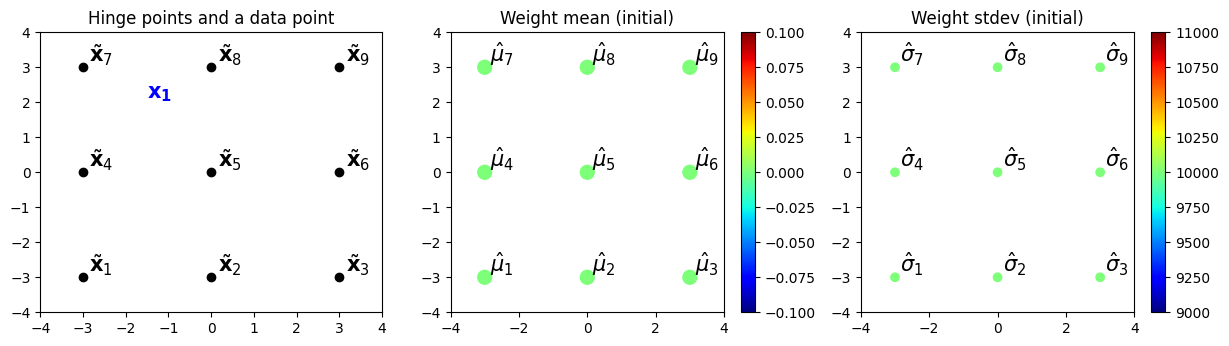

In [ ]:
variances = 10000*torch.ones((M,))
S_0 = torch.diag(variances).float()
m_0 = torch.zeros((M,1)).float()

plt.figure(figsize=(15,8))
plt.subplot(231)
plt.scatter(grid_points[:,0], grid_points[:,1], c='k', marker='o')
for i in range(N):
  plt.text(X[i,0]+0.1, X[i,1]+0.1, r'$\bf{x}' + f'_{i+1}$', color='b', fontsize=15)
for i in range(grid_points.shape[0]):
    plt.text(grid_points[i,0]+0.15, grid_points[i,1]+0.15, r'$\tilde{\bf{x}}$'+'$_{}$'.format(i+1), fontsize=15)
plt.title('Hinge points and a data point')
plt.xlim([-4,4])
plt.ylim([-4,4]);

plt.subplot(232)
plt.scatter(grid_points[:,0], grid_points[:,1], c=m_0.reshape(-1), s=100, cmap='jet'); plt.colorbar()
for i in range(grid_points.shape[0]):
    plt.text(grid_points[i,0]+0.15, grid_points[i,1]+0.15, r'$\hat{\mu}$'+'$_{}$'.format(i+1), fontsize=15)
plt.title('Weight mean (initial)')
plt.xlim([-4,4]); plt.ylim([-4,4]);

plt.subplot(233)
plt.scatter(grid_points[:,0], grid_points[:,1], c=variances, cmap='jet'); plt.colorbar()
for i in range(grid_points.shape[0]):
    plt.text(grid_points[i,0]+0.15, grid_points[i,1]+0.15, r'$\hat{\sigma}$'+'$_{}$'.format(i+1), fontsize=15)
plt.title('Weight stdev (initial)')
plt.xlim([-4,4]); plt.ylim([-4,4]);

+++EM iter 0
+++EM iter 1
+++EM iter 2
+++EM iter 3
+++EM iter 4
torch.Size([9, 1])
torch.Size([9, 9])


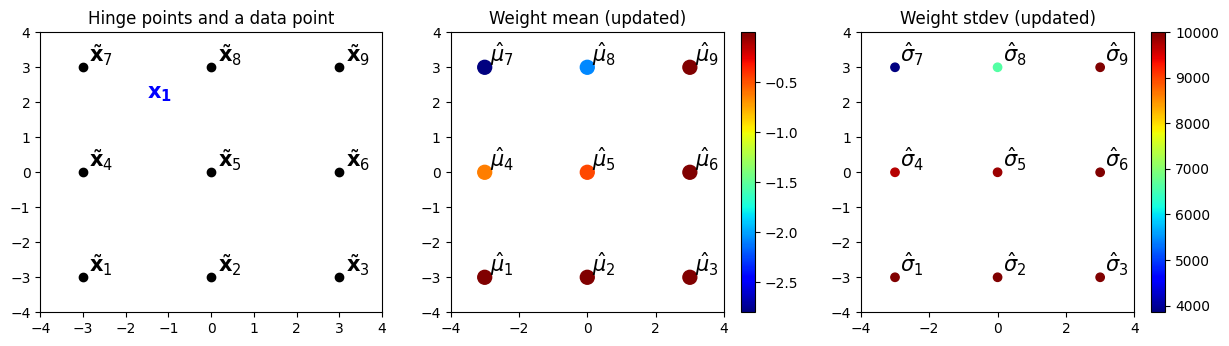

In [ ]:
xi = torch.ones((N,1))
sbhm = SBHM(S_0, m_0)
sbhm.EM_algo(t, Phi, xi, num_iters=5)
m_N = sbhm.mean
S_N = sbhm.covariance
print(m_N.shape)
print(S_N.shape)

plt.figure(figsize=(15,8))
plt.subplot(231)
plt.scatter(grid_points[:,0], grid_points[:,1], c='k', marker='o')
for i in range(N):
  plt.text(X[i,0]+0.1, X[i,1]+0.1, r'$\bf{x}' + f'_{i+1}$', color='b', fontsize=15)
for i in range(grid_points.shape[0]):
    plt.text(grid_points[i,0]+0.15, grid_points[i,1]+0.15, r'$\tilde{\bf{x}}$'+'$_{}$'.format(i+1), fontsize=15)
plt.title('Hinge points and a data point')
plt.xlim([-4,4])
plt.ylim([-4,4]);

plt.subplot(232)
plt.scatter(grid_points[:,0], grid_points[:,1], c=m_N.reshape(-1), s=100, cmap='jet'); plt.colorbar()
for i in range(grid_points.shape[0]):
    plt.text(grid_points[i,0]+0.15, grid_points[i,1]+0.15, r'$\hat{\mu}$'+'$_{}$'.format(i+1), fontsize=15)
plt.title('Weight mean (updated)')
plt.xlim([-4,4]); plt.ylim([-4,4]);

plt.subplot(233)
plt.scatter(grid_points[:,0], grid_points[:,1], c=torch.diagonal(S_N).reshape(-1), cmap='jet'); plt.colorbar()
for i in range(grid_points.shape[0]):
    plt.text(grid_points[i,0]+0.15, grid_points[i,1]+0.15, r'$\hat{\sigma}$'+'$_{}$'.format(i+1), fontsize=15)
plt.title('Weight stdev (updated)')
plt.xlim([-4,4]); plt.ylim([-4,4]);

# Prediction


torch.Size([1000, 9])


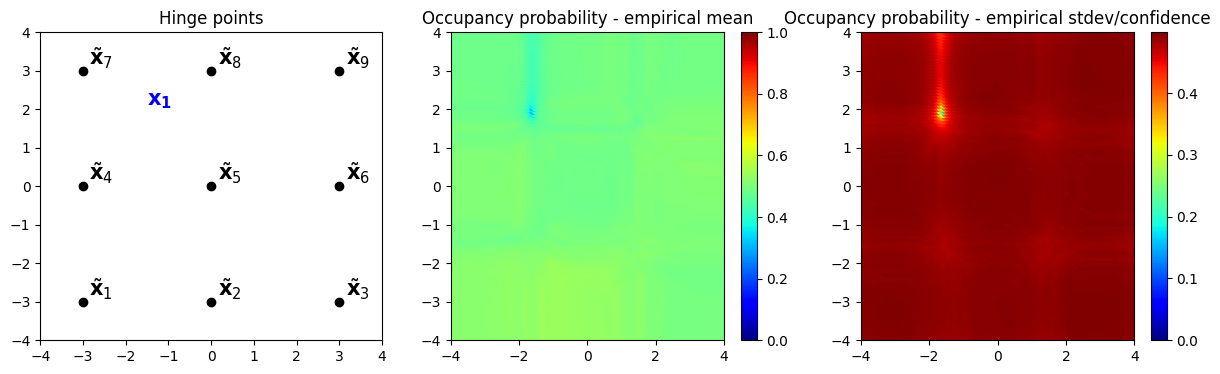

In [ ]:
from torch.distributions import MultivariateNormal

xy_upper_bound_q = np.array([4,4])
xy_lower_bound_q = np.array([-4,-4])
width_q = 100
qx_ax = np.linspace(start=xy_lower_bound_q[0], stop=xy_upper_bound_q[0], num=width_q)
qy_ax = np.linspace(start=xy_lower_bound_q[1], stop=xy_upper_bound_q[1], num=width_q)
qx_grid, qy_grid = np.meshgrid(qx_ax, qy_ax)
q_points = np.concatenate((qx_grid[:,:,np.newaxis], qy_grid[:,:,np.newaxis]), axis=-1)
qX = torch.tensor(q_points.reshape((-1,2)))

gamma = 0.5
qPhi = rbf_kernel(qX,hinge_pts,gamma=gamma, bias_trick=False).float()

num_samples = 1000
normal = MultivariateNormal(m_N.reshape(-1), S_N)
qW = normal.sample(torch.Size([num_samples])).float()
print(qW.shape)

pred = torch.sigmoid(torch.matmul(qPhi, qW.t())) #(N,num_samples)
pred_mean = torch.sum(pred, dim=-1)/qW.shape[0]
pred_std = torch.std(pred, dim=-1)

plt.figure(figsize=(15,4))
plt.subplot(131)
plt.scatter(grid_points[:,0], grid_points[:,1], c='k', marker='o')
for i in range(N):
  plt.text(X[i,0]+0.1, X[i,1]+0.1, r'$\bf{x}' + f'_{i+1}$', color='b', fontsize=15)
for i in range(grid_points.shape[0]):
    plt.text(grid_points[i,0]+0.15, grid_points[i,1]+0.15, r'$\tilde{\bf{x}}$'+'$_{}$'.format(i+1), fontsize=15)
plt.title('Hinge points')
plt.xlim([-4,4])
plt.ylim([-4,4]);

plt.subplot(132)
plt.scatter(qX[:,0], qX[:,1], c=pred_mean, cmap='jet', vmin=0, vmax=1)
plt.colorbar()
plt.title('Occupancy probability - empirical mean')
plt.xlim([-4,4]); plt.ylim([-4,4])

plt.subplot(133)
plt.scatter(qX[:,0], qX[:,1], c=pred_std, cmap='jet', vmin=0)
plt.colorbar()
plt.xlim([-4,4]); plt.ylim([-4,4])
plt.title('Occupancy probability - empirical stdev/confidence');

# Toy Dataset


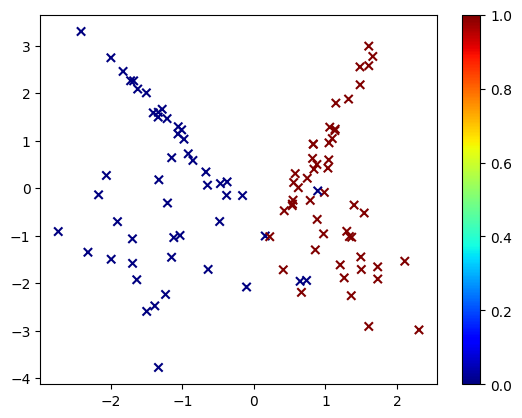

In [ ]:
from sklearn.datasets import make_classification

X2, t2 = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2)
t2 = t2.ravel()
plt.scatter(X2[:,0], X2[:,1], c=t2, marker='x', cmap='jet')
plt.colorbar()



+++EM iter 0
+++EM iter 1
+++EM iter 2


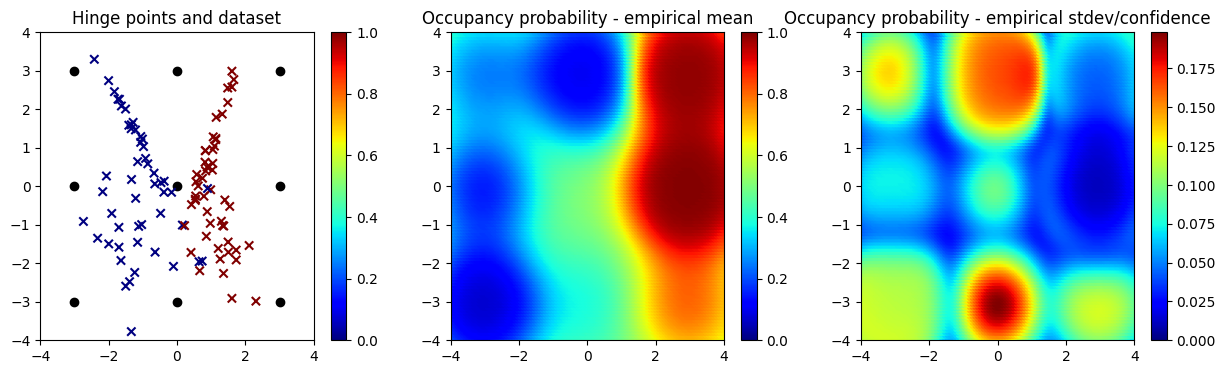

In [ ]:
xy_upper_bound = np.array([3,3])
xy_lower_bound = np.array([-3,-3])
width = 3
x_ax = np.linspace(start=xy_lower_bound[0], stop=xy_upper_bound[0], num=width)
y_ax = np.linspace(start=xy_lower_bound[1], stop=xy_upper_bound[1], num=width)
x_grid, y_grid = np.meshgrid(x_ax, y_ax)
grid_points = np.concatenate((x_grid[:,:,np.newaxis], y_grid[:,:,np.newaxis]), axis=-1)
grid_points = grid_points.reshape((-1,2))

gamma = 0.5
X = torch.tensor(X2).float()
t = torch.tensor(t2).reshape(-1,1).float()
hinge_pts = torch.tensor(grid_points).float()
Phi = rbf_kernel(X,hinge_pts,gamma=gamma, bias_trick=False)
N = Phi.shape[0]
M = Phi.shape[1]

variances = 10000*torch.ones((M,))
S_0 = torch.diag(variances).float()
m_0 = torch.zeros((M,1)).float()

xi = torch.ones((N,1))
sbhm = SBHM(S_0, m_0)
sbhm.EM_algo(t, Phi, xi, num_iters=3)
m_N = sbhm.mean
S_N = sbhm.covariance

#prediction
xy_upper_bound_q = np.array([4,4])
xy_lower_bound_q = np.array([-4,-4])
width_q = 100
qx_ax = np.linspace(start=xy_lower_bound_q[0], stop=xy_upper_bound_q[0], num=width_q)
qy_ax = np.linspace(start=xy_lower_bound_q[1], stop=xy_upper_bound_q[1], num=width_q)
qx_grid, qy_grid = np.meshgrid(qx_ax, qy_ax)
q_points = np.concatenate((qx_grid[:,:,np.newaxis], qy_grid[:,:,np.newaxis]), axis=-1)
qX = torch.tensor(q_points.reshape((-1,2)))

gamma = 0.5
qPhi = rbf_kernel(qX,hinge_pts,gamma=gamma, bias_trick=False).float()

num_samples = 1000
normal = MultivariateNormal(m_N.reshape(-1), S_N)
qW = normal.sample(torch.Size([num_samples])).float()
pred = torch.sigmoid(torch.matmul(qPhi, qW.t())) #(N,num_samples)
pred_mean = torch.sum(pred, dim=-1)/qW.shape[0]
pred_std = torch.std(pred, dim=-1)

#plot
plt.figure(figsize=(15,4))
plt.subplot(131)
plt.scatter(grid_points[:,0], grid_points[:,1], c='k', marker='o')
plt.scatter(X[:,0], X[:,1], c=t.reshape(-1), marker='x', cmap='jet')
plt.colorbar()
plt.title('Hinge points and dataset')
plt.xlim([-4,4]); plt.ylim([-4,4])

plt.subplot(132)
plt.scatter(qX[:,0], qX[:,1], c=pred_mean, cmap='jet', vmin=0, vmax=1)
plt.colorbar()
plt.title('Occupancy probability - empirical mean')
plt.xlim([-4,4]); plt.ylim([-4,4])

plt.subplot(133)
plt.scatter(qX[:,0], qX[:,1], c=pred_std, cmap='jet', vmin=0)
plt.colorbar()
plt.xlim([-4,4]); plt.ylim([-4,4])
plt.title('Occupancy probability - empirical stdev/confidence');


## More hinge points

+++EM iter 0
+++EM iter 1
+++EM iter 2


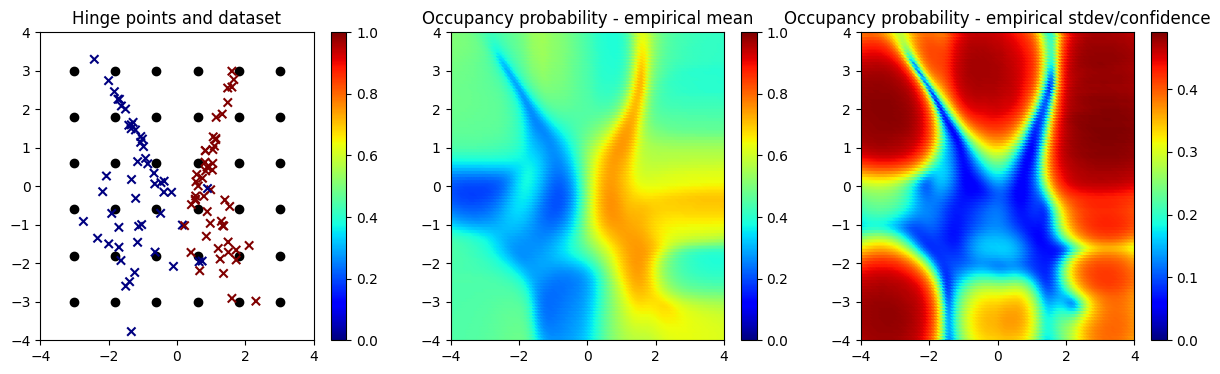

In [ ]:
xy_upper_bound = np.array([3,3])
xy_lower_bound = np.array([-3,-3])
width = 6
x_ax = np.linspace(start=xy_lower_bound[0], stop=xy_upper_bound[0], num=width)
y_ax = np.linspace(start=xy_lower_bound[1], stop=xy_upper_bound[1], num=width)
x_grid, y_grid = np.meshgrid(x_ax, y_ax)
grid_points = np.concatenate((x_grid[:,:,np.newaxis], y_grid[:,:,np.newaxis]), axis=-1)
grid_points = grid_points.reshape((-1,2))

gamma = 0.5
X = torch.tensor(X2).float()
t = torch.tensor(t2).reshape(-1,1).float()
hinge_pts = torch.tensor(grid_points).float()
Phi = rbf_kernel(X,hinge_pts,gamma=gamma, bias_trick=False)
N = Phi.shape[0]
M = Phi.shape[1]

variances = 10000*torch.ones((M,))
S_0 = torch.diag(variances).float()
m_0 = torch.zeros((M,1)).float()

xi = torch.ones((N,1))
sbhm = SBHM(S_0, m_0)
sbhm.EM_algo(t, Phi, xi, num_iters=3)
m_N = sbhm.mean
S_N = sbhm.covariance

#prediction
xy_upper_bound_q = np.array([4,4])
xy_lower_bound_q = np.array([-4,-4])
width_q = 100
qx_ax = np.linspace(start=xy_lower_bound_q[0], stop=xy_upper_bound_q[0], num=width_q)
qy_ax = np.linspace(start=xy_lower_bound_q[1], stop=xy_upper_bound_q[1], num=width_q)
qx_grid, qy_grid = np.meshgrid(qx_ax, qy_ax)
q_points = np.concatenate((qx_grid[:,:,np.newaxis], qy_grid[:,:,np.newaxis]), axis=-1)
qX = torch.tensor(q_points.reshape((-1,2)))

gamma = 0.5
qPhi = rbf_kernel(qX,hinge_pts,gamma=gamma, bias_trick=False).float()

num_samples = 1000
normal = MultivariateNormal(m_N.reshape(-1), S_N)
qW = normal.sample(torch.Size([num_samples])).float()
pred = torch.sigmoid(torch.matmul(qPhi, qW.t())) #(N,num_samples)
pred_mean = torch.sum(pred, dim=-1)/qW.shape[0]
pred_std = torch.std(pred, dim=-1)

#plot
plt.figure(figsize=(15,4))
plt.subplot(131)
plt.scatter(grid_points[:,0], grid_points[:,1], c='k', marker='o')
plt.scatter(X[:,0], X[:,1], c=t.reshape(-1), marker='x', cmap='jet')
plt.colorbar()
plt.title('Hinge points and dataset')
plt.xlim([-4,4]); plt.ylim([-4,4])

plt.subplot(132)
plt.scatter(qX[:,0], qX[:,1], c=pred_mean, cmap='jet', vmin=0, vmax=1)
plt.colorbar()
plt.title('Occupancy probability - empirical mean')
plt.xlim([-4,4]); plt.ylim([-4,4])

plt.subplot(133)
plt.scatter(qX[:,0], qX[:,1], c=pred_std, cmap='jet', vmin=0)
plt.colorbar()
plt.xlim([-4,4]); plt.ylim([-4,4])
plt.title('Occupancy probability - empirical stdev/confidence');
